<h1 style="text-align: center;">Natural Language Procesing: News Classifier</h1>

<br>
<div style="display:inline;"> By:
<ul style="display: inline;">
<li style="display: inline;"><a href="https://github.com/am2en" target="_blank">Ameen Taha</a></li>
, <li style="display: inline;"><a href="https://github.com/saebghazal" target="_blank">Saeb Ghazal</a></li>
, <li style="display: inline;"><a href="https://github.com/ramiazmi" target="_blank">Rami Tailakh</a></li>
</ul>
</div>


## Introduction:
In the past few years, data has been increased dramatically. Majority of data is unstructured, and text data is viewed as unstructured as well; from the computer perspective. That is, text data is (a large volume) set words, and these words contain alphabetical letters, numbers and special characters, in addition, it can contain both single-byte and multi-byte characters. As a result, text analysis is one of the important applications for many businesses and organizations, nowadays. 

Text data is employed in many domains; social media, news stories, customer reviews, emails, documents and many more. However, this type of data can be difficult to analyze. This is because each text is witten in a specific language, thereby, analyzing a text could differ from one language to another. Moreover, A word in a specific language can give different meanings, and more challenging, languages adapt according to cultures and there could be some differences in using and writing words from one geographic area to another for the same language.

Natural Language Processing (NLP) is the field of study that is concerned with the interactions between human language and computing machine. NLP, in other words, NLP is to enable a computerized program to understand human language to an accepted level. In this piece of work, we will apply NLP techniques on news stories aiming to classify the category of news articles.  



# Goal:
In this project, we will employ some machine learning models in order to build a classifier for news stories. The job of this classifier will specifically be to predict the category (health, technology, etc.) of a news story given only its titele.



# Ethics
Concerning data, our dataset has been downloaded from Kaggle website, and, this data is already found on UCI Machine Learning Repository <a href="#references">[1]</a>. This data is already published on public links. In addition, it does not contain information that could harm anybody. However, we could not have the chance to either verify the existence of this data on the web, or whether it has information that could be harmful. Moreover, the data only reveals the headline of an article, but it does not show its story.

Regarding the outcome of this project, the desired output will not be subjected to negatively impact any person (or organization) in anyways. Although the headline of each story is revealed, titles do not often contain harmful information. Furthermore, this piece of work will result in building a classifier that could help predict the category of an article from only its headline.

We hereby confirm that the submitted work is our own work completed for the fulfillment of the Applied Data Science Training Course organized by the Center for Continuing Education at Birzeit University. We also confirm that we have not made any kind of manipulation of data in a way that could lead to "better" accuracy results of our desired Prediction Model. 


# Project Process Flow

<img src="process_flow.png" >


# Imports
Here, all required packages in this project will be imported.

In [1]:
# This code is to disable warnings that may display this notebook a liitle bit "ugly"
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.pipeline import Pipeline

from nltk.corpus import stopwords

import string

from sklearn.learning_curve import learning_curve

from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

from collections import Counter

import pickle

import sys

import random

%matplotlib inline

C:\Users\Saeb\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Saeb\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Dataset:
We will use the [News Data Set from Kaggle](https://www.kaggle.com/uciml/news-aggregator-dataset).
This dataset contains headlines, publishers, URLs, and categories for 422,937 news articles. News categories included in this dataset include business; science and technology; entertainment; and health. 

### Get the Data

The next code is to read the uci-news-aggregator.csv file and set it as a dataframe called news.

In [3]:
news = pd.read_csv('uci-news-aggregator_small.csv')

### Helper Functions
These are the functions that will be used in this project.

In [4]:
def count_words(str):
    '''
    This function is count the number of words in a given text.
    '''
    return len(str.split())


#########################################################################
def text_process(mess):
    """
    This function takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(['2014', 'us','new','may']) # remove it if you need punctuation 

    return ' '.join(word for word in nopunc.split() if word.lower() not in stop_words)


#########################################################################
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    This function is to generate a simple plot of the test and traning learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#########################################################################
def normalize_text(p_message):
    '''
    This function will remove all stop words from a given text.
    '''
    nopunc = [char for char in p_message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ''.join(word.lower() for word in nopunc.split() if word not in stopwords.words('english'))  


#########################################################################
def class_desc(p_class):
    '''
    This function is to return the description of CATEGORY.
    '''
    if p_class == 'b':
        str = 'Business'
    elif p_class == 't':
        str = 'Science and Technology'
    elif p_class == 'e':
        str = 'Entertainment'
    elif p_class == 'm':
        str = 'Health'
    else:
        p_class = ''
    
    return str


#########################################################################
def read_from_pickle(pickle_fname):
    with open(pickle_fname+'.pickle', 'rb') as handle:
        return pickle.load(handle)

# EDA
In this section, we are going to view the dataset structure and do some exploration analysis on the data.

In [5]:
news.head(2)

,Unnamed: 0,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207


In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
Unnamed: 0    40000 non-null int64
ID            40000 non-null int64
TITLE         40000 non-null object
URL           40000 non-null object
PUBLISHER     39998 non-null object
CATEGORY      40000 non-null object
STORY         40000 non-null object
HOSTNAME      40000 non-null object
TIMESTAMP     40000 non-null int64
dtypes: int64(3), object(6)
memory usage: 2.7+ MB


In [7]:
news.describe()

,Unnamed: 0,ID,TIMESTAMP
count,40000.000000,40000.000000,4.000000e+04
mean,24077.724675,24082.332175,1.395207e+12
std,19431.702872,19442.001602,5.220245e+08
min,0.000000,1.000000,1.394470e+12
25%,9999.750000,10000.750000,1.394715e+12
50%,19999.500000,20000.500000,1.395168e+12
75%,30588.250000,30589.250000,1.395510e+12
max,90136.000000,90212.000000,1.396940e+12


**Data Preprocessing**

We are going to create a new column called <b>TITLE_LENGTH</b> which represents the number of words in the <b>TITLE</b> column which represents an article headline. This will, then, help do some EDA analytics.

In [8]:
news['TITLE_LENGTH'] = news['TITLE'].apply(count_words)

**Data Exploration**

The following plot is to show the number of articles per each <b>CATEGORY</b>.

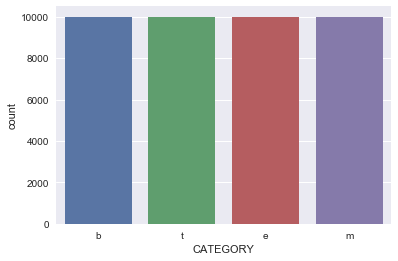

In [9]:
sns.countplot(x="CATEGORY", data=news)

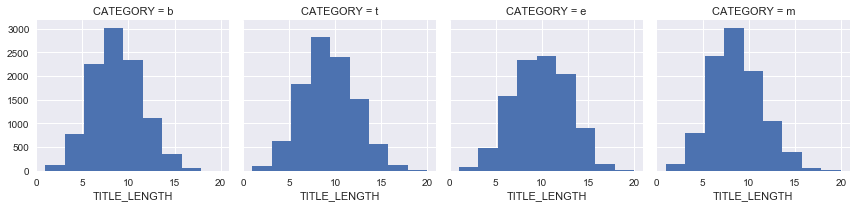

In [10]:
g = sns.FacetGrid(news, col="CATEGORY", sharey=True)  
g.map(plt.hist, "TITLE_LENGTH", bins=np.linspace(1, 20, 10))

The following is to plot a boxplot to show the distribution of word counts (using <b>TITLE_LENGTH</b> column) per each <b>CATEGORY<b>.

(0, 30)

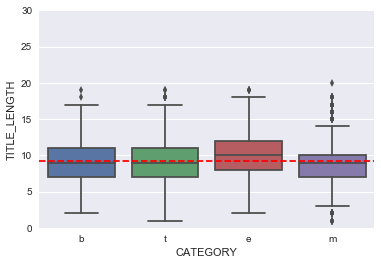

In [11]:
_= sns.boxplot(x='CATEGORY', y='TITLE_LENGTH', data = news)
plt.axhline(y=news.TITLE_LENGTH.mean(), color='r', ls='--')
_.set_ylim(0,30)

The following plot is to display the histogram according to the <b>TITLE</b> words count per each <b>CATEGORY</b>.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C669858048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C6699496A0>]], dtype=object)

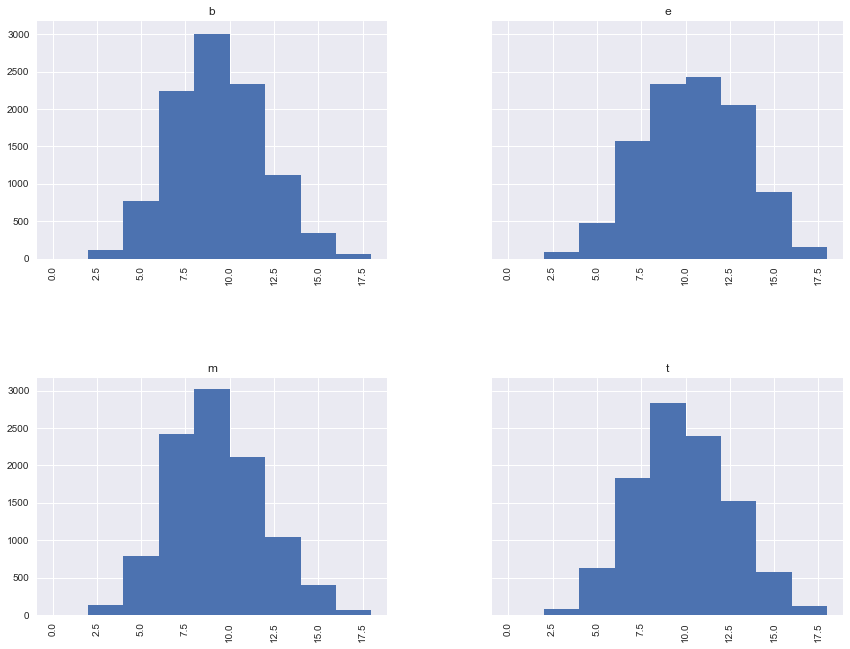

In [12]:
news.hist(column='TITLE_LENGTH', by='CATEGORY', bins=range(0, 20,2),figsize=(14,11), sharey=True)

**Words Representation**

The following code is show the most representative words per each <b>CATEGORY</b>. While the following code will plot the most representative words per each <b>CATEGORY</b>.

In [13]:
caption_0 = widgets.Label('Enter a number:')
text_0 = widgets.IntText(value=10)
button_0 = widgets.Button(description="Plot")
display(caption_0,text_0,button_0)

def histogram_label():
    n = text_0.value # Top n words
    corpus_size = 0
    i=1
    df = news[['TITLE','CATEGORY']]
    df['TITLE'] = news['TITLE'].apply(text_process).str.lower()
    categories = news.CATEGORY.unique()
    for category in categories:
            df_title=df.query('CATEGORY ==  @category')
            result =" ".join(df_title['TITLE'].values.tolist()).split(" ")
            r = pd.DataFrame(result, columns=['WORDS'])
            corpus_size = corpus_size + len(r['WORDS'].unique())
            Counter_=Counter(result).most_common(n)
            labels = [item[0] for item in Counter_]
            number = [item[1] for item in Counter_]
            nbars = len(Counter_)
            plt.subplot(2,2,i)
            plt.xticks(rotation=90,fontsize=15)
            plt.yticks(fontsize=15)
            plt.title(class_desc(category), fontsize=18)
            plt.bar(np.arange(nbars), number, tick_label=labels)
            i=i+1
    return corpus_size

def handle_submit(sender):
    t = ("Plot is being performed! Please wait ...")
    sys.stdout.write('\r'+t)
    plt.figure(figsize=(15,10))
    s = histogram_label()
    plt.tight_layout()
    sys.stdout.write('\r'+'Corpus Size: ' + str(s))
    sys.stdout.flush()
    
button_0.on_click(handle_submit)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


# News Classification

The EDA section, mentioned above, has given some information about factors that could help perform classification of news stories to some level. In other words, the EDA has given some important information, but this could not be viewed enough to give more confident results of classifying news articles. For instance, the word <b>Google</b> is one of the most frequent words in the t-category (Technology and Science) articles, but this word could be used in business articles, and therefore, it cannot be generalized that every story that has the <b>Google</b> it leads to classify it as t-category.  In this section we are going to employ machine learning to help achieve the goal of this project.

According to EDA, it can be seen that the most significant feature is: <b>TITLE</b>. In the next code, we are going to create two objects X and y. X will be the 'TITLE' column of 'news' dataset. Moreover, as our case is supervised, y will be the class which is the <b>CATEGORY</b> column of our exploited dataset.

In [14]:
X = news.TITLE
y = news.CATEGORY

## Train Test Split

Following the best practices, we are going to split our data into training and testing data.

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28000,) (12000,) (28000,) (12000,)


## Training Model

In this piece of work, we will implement different models and show the classification output according to each one. Then, the final result of prediction will be based on the result of all predictions as it will be presnted in the follwoing sections.

In order to make the procees of processing; vectorizer => transformer => classifier, easier, we will create a pipeline with the following steps: 
<ol>
<li>CountVectorizer()</li><li>TfidfTransformer()</li><li>Classifer; Suitable Supervised Model</li>

#### Training using Multinomial Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

# Initializing Pipline
pipelineNB = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors
])

# Training the model
pipelineNB.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineNB.pickle', 'wb') as handle:
    pickle.dump(pipelineNB, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Predictions
predictionsNB = pipelineNB.predict(X_test)

# Model Evaluation
print(classification_report(predictionsNB, y_test))

             precision    recall  f1-score   support

          b       0.94      0.93      0.93      3058
          e       0.97      0.97      0.97      3017
          m       0.96      0.97      0.96      2923
          t       0.93      0.94      0.93      3002

avg / total       0.95      0.95      0.95     12000



In [17]:
# This is just for testing purposes :)
with open('pipelineNB.pickle', 'rb') as handle:
    NB = pickle.load(handle)
NB.predict(["See Mark Hamill prank 'Star Wars' superfans"])[0]

'e'

##### Cross Validation

In [18]:
%time scoresNB = cross_val_score(pipelineNB, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresNB))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresNB.mean(), scoresNB.std()))
scoresNB = scoresNB.mean()

Wall time: 2.29 s
Cross-validation scores: [ 0.95322264  0.94840207  0.95571429  0.94410714  0.95105395]
Average cross-validation score: 0.95 +/- 0.00


Wall time: 9.4 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Saeb\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

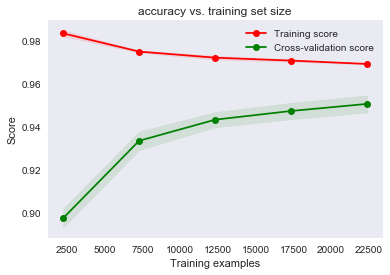

In [19]:
%time plot_learning_curve(pipelineNB, "accuracy vs. training set size", X_train, y_train, cv=5)

#### Training using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

pipelineLOG = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors
])
%time pipelineLOG.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineLOG.pickle', 'wb') as handle:
    pickle.dump(pipelineLOG, handle, protocol=pickle.HIGHEST_PROTOCOL)

predictionsLOG = pipelineLOG.predict(X_test)

print(classification_report(predictionsLOG, y_test))

Wall time: 1.31 s
             precision    recall  f1-score   support

          b       0.95      0.92      0.94      3111
          e       0.97      0.98      0.98      3000
          m       0.96      0.97      0.97      2932
          t       0.93      0.96      0.94      2957

avg / total       0.96      0.96      0.96     12000



In [21]:
# This is just for testing purposes :)
with open('pipelineLOG.pickle', 'rb') as handle:
    LOG = pickle.load(handle)
LOG.predict(["See Mark Hamill prank 'Star Wars' superfans"])[0]

'e'

##### Cross Validation

In [22]:
%time scoresLOG = cross_val_score(pipelineLOG, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresLOG))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresLOG.mean(), scoresLOG.std()))
scoresLOG = scoresLOG.mean()

Wall time: 5.16 s
Cross-validation scores: [ 0.95661489  0.9530441   0.95625     0.94946429  0.9528403 ]
Average cross-validation score: 0.95 +/- 0.00


Wall time: 12.4 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Saeb\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

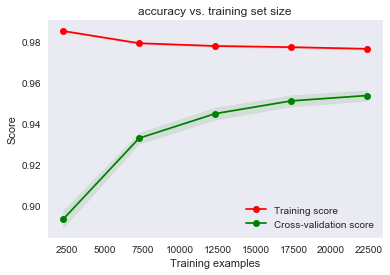

In [23]:
%time plot_learning_curve(pipelineLOG, "accuracy vs. training set size", X_train, y_train, cv=5)

#### Training using Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

pipelineDT = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier(max_depth=10,random_state=0)),  # train on TF-IDF vectors
])

%time pipelineDT.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineDT.pickle', 'wb') as handle:
    pickle.dump(pipelineDT, handle, protocol=pickle.HIGHEST_PROTOCOL)

predictionsDT = pipelineDT.predict(X_test)

print(classification_report(predictionsDT, y_test))

Wall time: 722 ms
             precision    recall  f1-score   support

          b       0.92      0.33      0.48      8485
          e       0.31      0.54      0.39      1725
          m       0.33      0.99      0.49       964
          t       0.27      0.99      0.42       826

avg / total       0.74      0.46      0.47     12000



##### Cross Validation

In [25]:
%time scoresDT = cross_val_score(pipelineDT, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresDT))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresDT.mean(), scoresDT.std()))
scoresDT = scoresDT.mean()

Wall time: 3.38 s
Cross-validation scores: [ 0.46206035  0.45491876  0.45035714  0.45732143  0.45301894]
Average cross-validation score: 0.46 +/- 0.00


Wall time: 10.9 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Saeb\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

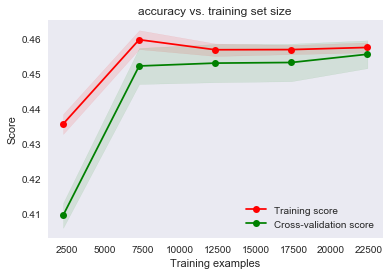

In [26]:
%time plot_learning_curve(pipelineDT, "accuracy vs. training set size", X_train, y_train, cv=5)

#### Training using Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

pipelineRF = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators=20)),  # train on TF-IDF vectors
])

%time pipelineRF.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineRF.pickle', 'wb') as handle:
    pickle.dump(pipelineRF, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
predictionsRF = pipelineRF.predict(X_test)

print(classification_report(predictionsRF, y_test))

Wall time: 9 s
             precision    recall  f1-score   support

          b       0.93      0.90      0.91      3140
          e       0.96      0.96      0.96      2992
          m       0.94      0.93      0.94      2981
          t       0.90      0.95      0.92      2887

avg / total       0.93      0.93      0.93     12000



##### Cross Validation

In [28]:
%time scoresRF = cross_val_score(pipelineRF, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresRF))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresRF.mean(), scoresRF.std()))
scoresRF = scoresRF.mean()

Wall time: 32.9 s
Cross-validation scores: [ 0.9376897   0.92858418  0.92875     0.92696429  0.92997499]
Average cross-validation score: 0.93 +/- 0.00


In [29]:
# %time plot_learning_curve(pipelineRF, "accuracy vs. training set size", X_train, y_train, cv=5)

#### Training using K-Neighbors Classifier
For memory limitation errors, there was no chance to use KNN classifier.

In [30]:
# from sklearn.neighbors import KNeighborsClassifier

# pipelineKNN = Pipeline([
#     ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', KNeighborsClassifier()),  # train on TF-IDF vectors
# ])

# %time pipelineKNN.fit(X_train, y_train)

# # Saving training results using Pickle
# with open('pipelineKNN.pickle', 'wb') as handle:
#     pickle.dump(pipelineKNN, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# predictionsKNN = pipelineKNN.predict(X_test)

# print(classification_report(predictionsKNN, y_test))

##### Cross Validation

In [31]:
# %time scoresKNN = cross_val_score(pipelineKNN, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(scoresKNN))
# print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresKNN.mean(), scoresKNN.std()))
# scoresKNN = scoresKNN.mean()

In [32]:
# %time plot_learning_curve(pipelineKNN, "accuracy vs. training set size", X_train, y_train, cv=5)

#### Training using SVM

In [33]:
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

pipelineSV = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearSVC()),  # train on TF-IDF vectors
])

%time pipelineSV.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineSV.pickle', 'wb') as handle:
    pickle.dump(pipelineSV, handle, protocol=pickle.HIGHEST_PROTOCOL)

predictionsSV = pipelineSV.predict(X_test)

print(classification_report(predictionsSV, y_test))

Wall time: 1.07 s
             precision    recall  f1-score   support

          b       0.95      0.94      0.94      3072
          e       0.98      0.99      0.98      2985
          m       0.97      0.97      0.97      2936
          t       0.95      0.96      0.95      3007

avg / total       0.96      0.96      0.96     12000



In [34]:
# This is just for testing purposes :)
with open('pipelineSV.pickle', 'rb') as handle:
    SV = pickle.load(handle)
SV.predict(["See Mark Hamill prank 'Star Wars' superfans"])[0]

'e'

##### Cross Validation

In [35]:
%time scoresSV = cross_val_score(pipelineSV, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresSV))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresSV.mean(), scoresSV.std()))
scoresSV = scoresSV.mean()

Wall time: 5.17 s
Cross-validation scores: [ 0.96179254  0.96286377  0.96428571  0.96017857  0.96463023]
Average cross-validation score: 0.96 +/- 0.00


Wall time: 12.7 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Saeb\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

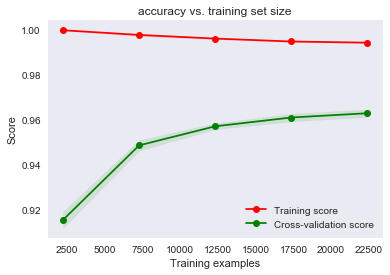

In [36]:
%time plot_learning_curve(pipelineSV, "accuracy vs. training set size", X_train, y_train, cv=5)

#### Training using Neural-Network

In [37]:
from sklearn.neural_network import MLPClassifier

# Initializing Pipline
pipelineMLP = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=2)),  # train on TF-IDF vectors   # hidden_layer_sizes=2
])

# Training the model
%time pipelineMLP.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineMLP.pickle', 'wb') as handle:
    pickle.dump(pipelineMLP, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Predictions
predictionsMLP = pipelineMLP.predict(X_test)

# Model Evaluation
print(classification_report(predictionsMLP, y_test))

Wall time: 17.4 s
             precision    recall  f1-score   support

          b       0.92      0.94      0.93      2957
          e       0.98      0.96      0.97      3074
          m       0.96      0.97      0.96      2917
          t       0.94      0.94      0.94      3052

avg / total       0.95      0.95      0.95     12000



##### Cross Validation

In [38]:
%time scoresMLP = cross_val_score(pipelineMLP, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresMLP))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresMLP.mean(), scoresMLP.std()))
scoresMLP = scoresMLP.mean()

Wall time: 1min 17s
Cross-validation scores: [ 0.93501161  0.94643814  0.93982143  0.94625     0.94426581]
Average cross-validation score: 0.94 +/- 0.00


In [39]:
# For resource limitations, this part could not work properly
# %time plot_learning_curve(pipelineMLP, "accuracy vs. training set size", X_train, y_train, cv=5)

## TensorFlow , Keras

In [41]:
import collections
import nltk 
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.utils import np_utils
from keras.layers import Dense, Dropout, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [42]:
# dfnews = pd.read_csv("uci-news-aggregator_small.csv")
dfnews=news.copy()

In [43]:
dfnews=dfnews[['CATEGORY','TITLE']].copy()
# change categories to numbers
dfnews.loc[dfnews["CATEGORY"] == "e", "CATEGORY"] = 0
dfnews.loc[dfnews["CATEGORY"] == "b", "CATEGORY"] = 1
dfnews.loc[dfnews["CATEGORY"] == "t", "CATEGORY"] = 2
dfnews.loc[dfnews["CATEGORY"] == "m", "CATEGORY"] = 3

In [46]:
counter = collections.Counter()
maxlen = 0
for i in range(0, len(dfnews)):
  
    sent = dfnews.iloc[i]['TITLE']
    words = [x.lower() for x in nltk.word_tokenize(sent)]
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
            counter[word] += 1


In [53]:
VOCAB_SIZE=10000
word2index = collections.defaultdict(int)
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1
vocab_sz = len(word2index) + 1
index2word = {v:k for k, v in word2index.items()}

In [54]:
#  Save word2index to Pickle file
import pickle
# write python dict to a file
output = open('word2index.pkl', 'wb')
pickle.dump(word2index, output)
output.close()

In [55]:
# load word2index Pickle
pkl_file = open('word2index.pkl', 'rb')
word2index = pickle.load(pkl_file)
pkl_file.close()

In [56]:
# prepare data ...... for the CNN  model

xs, ys = [], []
# with open(INPUT_FILE, "r", encoding='utf-8') as f:
#     for line in f:
for i in range(0, len(dfnews)):
#         label, sent = line.strip().split("\t")
    sent = dfnews.iloc[i]['TITLE']
    label=dfnews.iloc[i]['CATEGORY']
    ys.append(int(label))
    words = [x.lower() for x in nltk.word_tokenize(sent)]
    wids = [word2index[word] for word in words]
    xs.append(wids)

In [57]:
print (maxlen)
# set maxlen 
maxlen=64

64


In [58]:
X = pad_sequences(xs, maxlen=maxlen)
y = np_utils.to_categorical(ys, num_classes=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28000, 64) (12000, 64) (28000, 4) (12000, 4)


### CNN model

In [59]:
# Model paameters
EMBED_SIZE=100
NUM_WORDS=4
NUM_FILTERS=256
NUM_EPOCHS=1
BATCH_SIZE=100

In [60]:
model = Sequential()
model.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen))
#model.add(SpatialDropout1D(Dropout(0.2))) #---- not supported in keras 2
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=NUM_FILTERS, kernel_size=NUM_WORDS, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(4, activation="softmax"))

In [61]:
# X_train, X_test, y_train, y_test
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, verbose=True,
                    epochs=NUM_EPOCHS,
                    validation_data=(X_test, y_test))  

Train on 28000 samples, validate on 12000 samples
Epoch 1/1
28000/28000 [==============================] - 78s - loss: 0.1675 - acc: 0.9298 - val_loss: 0.0545 - val_acc: 0.9801


In [62]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=True ) # verbose=1 to see output
scoreCNN=score[1]
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))

11968/12000 [============================>.] - ETA: 0sTest score: 0.055, accuracy: 0.980


In [67]:
# save the model
model.save('news_cnn.mdl',overwrite=True,include_optimizer=True)

In [68]:
# load the model
from keras.models import load_model
mymodel =  load_model('news_cnn.mdl')

In [69]:
# fuction to tell predictions  ...

def pred_cnn(title , cnn_model= 'news_cnn.mdl',word2indexfile='word2index.pkl'):
    pkl_file = open('word2index.pkl', 'rb')
    word2index = pickle.load(pkl_file)
    
    mymodel =  load_model(cnn_model) 
    
    xs = []
    words = [x.lower() for x in nltk.word_tokenize(title)]
    wids  = [word2index[word] for word in words]
    xs.append(wids)
    X = pad_sequences(xs, maxlen=64)
    preds = mymodel.predict_classes(X)
    lst=['e','b','t','m'] 
    return  lst [preds[0]]

In [70]:
# pred_cnn('love')

### Model Scores
In this sub-section we will store the sore results using Pickle, to be used later in our data product.

In [71]:
# scoresNB = 0.92
# scoresLOG = 0.94
# scoresRF = 0.91
# scoresSV = 0.95
# scoresMLP = 0.92
# scoreCNN=0.98

df_scores = pd.Series([scoresNB, scoresLOG, scoresRF, scoresSV, scoresMLP,scoreCNN], index=['1', '2', '3','4','5','6'])

# Saving score results using Pickle
with open('df_scores.pickle', 'wb') as handle:
    pickle.dump(df_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)

# System Evaluation and Deployment
In this section we will create the <b>ensemble_predic</b> funtion. This function will take in a text, which is the headline of a news artice, then it gives back the category of the given article headline. The prediction works as follows. It predict the category of the given text employing different supervised learning models. As the label is discrete, then, we have employed different classifiers as shown in the <b>News Classification</b> section. The prediction result is based on the highest mean of each category group.

In [72]:
# We neglected the Decision Treen Classification model as a result of its lower accuracy in our case
all_scores = read_from_pickle('df_scores')

def ensemble_predic(p_title, print_allowed = False):
    results = pd.DataFrame({'model' : pd.Series(['NB', 'LOG', 'RF', 'SV', 'MLP','CNN'], index=['1', '2', '3','4','5','6']),
                            'class' : pd.Series([read_from_pickle('pipelineNB').predict([p_title])[0], 
                                                 read_from_pickle('pipelineLOG').predict([p_title])[0],
                                                 read_from_pickle('pipelineRF').predict([p_title])[0],
                                                 read_from_pickle('pipelineSV').predict([p_title])[0],
                                                 read_from_pickle('pipelineMLP').predict([p_title])[0],
                                                 pred_cnn(p_title)], index=['1', '2', '3','4','5','6']),
                           'percent' : all_scores})

     
    if print_allowed:
        print(results)
    return results.groupby('class')['percent'].mean().idxmax()

In [73]:
# pred_cnn('health')()

ensemble_predic('',True)

1/1 [==============================] - 0s
  class model   percent
1     m    NB  0.950500
2     b   LOG  0.953643
3     b    RF  0.930393
4     b    SV  0.962750
5     e   MLP  0.942357
6     m   CNN  0.980104


'm'

In [74]:
 read_from_pickle('pipelineMLP').predict(['health'])[0]

'm'

## Model Evaluation
In this sub-section we will evaluate our model using the Test set resulted from the split preocess. We will calculate the expected prediction using the <b>ensemble_predic</b> function, and compare the prediction results against the actual category of each story in the test set. Significantly, without a normalizing function; specifically removing stops words; the results seem to be better in terms of accuracy. From the confusion matrix results, shown below, it can be seen that our Prediction Model gives good results with high accuracy percentage. Nevertheles, for hardware resources issues, we could not evaluate our model on the whole testing dataset (X_test). Rather, the model has been tested against 5000 randomly-selected observations (articles).

In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df =  X_test_df.sample(replace=True, n=5000)
# X_test_df['CATEGORY']=y_test
# %time X_test_df['EXPECTED_CATEGORY'] = X_test_df.apply(lambda row: ensemble_predic(row['TITLE']), axis=1)
#%time X_test_df['EXPECTED_CATEGORY'] = X_test_df['TITLE'].apply(ensemble_predic)

# print('Confusion matrix:')
# print(classification_report(X_test_df.EXPECTED_CATEGORY, X_test_df.CATEGORY))

## Model Deployment
In this sub-section, we have built a simple user interface that accepts a text and gives back the most likely classification.

In [ ]:
caption = widgets.Label('Enter an article here:')
text = widgets.Textarea()
button = widgets.Button(description="Classify")
display(caption,text,button)

def handle_submit(sender):
    message = text.value
    clear_output()
    print('Text: '+message)
    print('\n')
    print('Most likely prediction: ', class_desc(ensemble_predic(message, True)))
    print('\n-----------------------------------------------------------------------')
    print('b = business, t = science and technology, e = entertainment, m = health')
    
button.on_click(handle_submit)


'''
   Testing Examples:
    - Testing examples:
    - IBM sales has grown 33% in the last 5 years
    - Pearson shareholders reject chief executive's £1.5m pay package 
    - World Bank transfers $5.6 million to PA
    - Child’s Play Is Good for All of Us
    - Why Kids Shouldn’t Sit Still in Class
    - Why Deep Breathing May Keep Us Calm
    - In Rare Unity, Hospitals, Doctors and Insurers Criticize Health Bill
    - Scientists can now count birds from space
    - What to expect with the iPhone 8
    - See Mark Hamill prank 'Star Wars' superfans
    - Lyft and Waymo Reach Deal to Collaborate on Self-Driving Cars
'''

# Conclusion and Future Work
In this project, news classifiers has been developed. Some supervised learning machine learning models were employed in the prediction of the category of news story. As seen in the deployment section, each model could give different results from otherclassifiers, and so, the final result was calculated based on the highest mean of a ctegory result.

As seen in this piece of work, the data tested was for news stories witten in the English language. As a futeure work, we will re-train and test our model on articles in the Arabic language. An aggregator can also be built employing the desired classifier. This aggregator shall be enabled to collect news stories based on a specific category that is of an interest of a specific user.

<p name="references" id="references" style="    font-size: 185.7%;margin: 1.08em 0 0 0;font-weight: bold; line-height: 1.0;">References</p> 

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.